# Single-Cell RNA-sequencing

Single-Cell RNA-sequencing (scRNA-seq) is the process of capturing the gene expression levels at each cell.
This kind of data has many applications in health sciences, such as finding potential new therapeutic targets for diseases.
In this example, we will look at a dataset of 515 cells of breast cancer patients.

For more information on Single-Cell RNA-sequencing, refer to [this paper](https://genomemedicine.biomedcentral.com/articles/10.1186/s13073-017-0467-4).

# Download data

Run the commands below once to download the data. The dataset consists of two files. 
matrix.txt.gz lists gene expression data, and information.txt.gz lists the metadata associated to it.

In [1]:
# !rm -rf data
# !mkdir data
# !wget -O data/matrix.txt.gz https://ftp.ncbi.nlm.nih.gov/geo/series/GSE75nnn/GSE75688/suppl/GSE75688_GEO_processed_Breast_Cancer_raw_TPM_matrix.txt.gz
# !wget -O data/information.txt.gz https://ftp.ncbi.nlm.nih.gov/geo/series/GSE75nnn/GSE75688/suppl/GSE75688_final_sample_information.txt.gz

# Reading files

In [2]:
import pandas as pd

## Gene expression data

The first three columns of matrix.txt.gz list the [Ensembl](https://www.ensembl.org) id, name, and type for each gene, respectively. 
The following 14 columns list patients' bulk scRNA-seq values (some have more than one column).
The remaining 549 columns represent the gene expression levels for each cell.

In [3]:
data = pd.read_csv('data/matrix.txt.gz', sep='\t')
data

,gene_id,gene_name,gene_type,BC01_Pooled,BC01_Tumor,BC02_Pooled,BC03_Pooled,BC03LN_Pooled,BC04_Pooled,BC05_Pooled,...,BC11_04,BC11_07,BC11_28,BC11_43,BC11_56,BC11_69,BC11_70,BC11_78,BC11_81,BC11_88
0,ENSG00000000003.10,TSPAN6,protein_coding,2.33,1.25,43.96,7.64,9.32,133.37,84.77,...,0.00,47.44,16.11,0.00,6.56,0.00,0.00,0.00,200.82,0.00
1,ENSG00000000005.5,TNMD,protein_coding,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,ENSG00000000419.8,DPM1,protein_coding,60.70,28.44,74.73,41.41,87.69,120.41,70.67,...,198.96,0.00,0.00,20.63,0.00,0.00,0.00,136.07,22.03,204.58
3,ENSG00000000457.9,SCYL3,protein_coding,47.93,4.43,9.89,7.61,7.32,12.42,12.02,...,0.00,10.96,0.00,0.00,0.00,0.27,0.00,0.07,0.19,9.52
4,ENSG00000000460.12,C1orf112,protein_coding,4.79,1.67,10.87,0.92,15.13,17.10,5.69,...,0.00,6.97,9.02,0.00,0.00,0.14,247.69,22.60,11.35,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57910,ERCC-00170,ERCC-00170,ERCC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57911,ERCC-00171,ERCC-00171,ERCC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57912,SPIKE1,EC2,SPIKE_IN,14940.70,45728.19,10442.91,94250.71,40823.13,24540.58,12613.85,...,166346.51,54443.35,120842.89,135291.06,138048.60,58840.26,65246.34,33465.11,108901.35,57492.01
57913,SPIKE2,EC15,SPIKE_IN,985.82,607.50,362.55,2949.35,1291.13,854.53,399.57,...,6860.84,2136.69,4048.09,4062.59,4147.05,2286.91,2821.49,1652.19,3439.53,1837.41


When it comes about gene expression data, each cell is a sample, and each gene is a feature.
Every value in the matrix denotes the expression levels of a particular gene for a given cell.
While the matrix presents genes in rows and cells in columns, most machine learning libraries expect
samples to be represented by rows and features by colums.
Hence, we need to transpose the matrix.

In [4]:
data = data.T
data.columns = data.iloc[0,:]
data['sample'] = data.index.values
data

gene_id,ENSG00000000003.10,ENSG00000000005.5,ENSG00000000419.8,ENSG00000000457.9,ENSG00000000460.12,ENSG00000000938.8,ENSG00000000971.11,ENSG00000001036.9,ENSG00000001084.6,ENSG00000001167.10,...,ERCC-00163,ERCC-00164,ERCC-00165,ERCC-00168,ERCC-00170,ERCC-00171,SPIKE1,SPIKE2,SPIKE3,sample
gene_id,ENSG00000000003.10,ENSG00000000005.5,ENSG00000000419.8,ENSG00000000457.9,ENSG00000000460.12,ENSG00000000938.8,ENSG00000000971.11,ENSG00000001036.9,ENSG00000001084.6,ENSG00000001167.10,...,ERCC-00163,ERCC-00164,ERCC-00165,ERCC-00168,ERCC-00170,ERCC-00171,SPIKE1,SPIKE2,SPIKE3,gene_id
gene_name,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ERCC-00163,ERCC-00164,ERCC-00165,ERCC-00168,ERCC-00170,ERCC-00171,EC2,EC15,EC18,gene_name
gene_type,protein_coding,protein_coding,protein_coding,protein_coding,protein_coding,protein_coding,protein_coding,protein_coding,protein_coding,protein_coding,...,ERCC,ERCC,ERCC,ERCC,ERCC,ERCC,SPIKE_IN,SPIKE_IN,SPIKE_IN,gene_type
BC01_Pooled,2.33,0.0,60.7,47.93,4.79,0.0,0.06,46.54,11.61,9.51,...,0.0,0.0,0.0,0.0,0.0,0.0,14940.7,985.82,0.0,BC01_Pooled
BC01_Tumor,1.25,0.0,28.44,4.43,1.67,0.0,9.64,20.97,5.97,4.81,...,0.0,0.0,0.0,0.0,0.0,0.0,45728.19,607.5,0.0,BC01_Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC11_69,0.0,0.0,0.0,0.27,0.14,0.0,0.0,7.06,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,58840.26,2286.91,0.0,BC11_69
BC11_70,0.0,0.0,0.0,0.0,247.69,0.0,0.81,4.49,0.0,53.21,...,0.0,0.0,0.0,0.0,0.0,0.0,65246.34,2821.49,0.0,BC11_70
BC11_78,0.0,0.0,136.07,0.07,22.6,0.0,0.83,0.82,70.26,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,33465.11,1652.19,0.0,BC11_78
BC11_81,200.82,0.0,22.03,0.19,11.35,0.0,0.0,4.32,1.12,6.15,...,0.0,0.0,0.0,0.0,0.0,0.0,108901.35,3439.53,0.0,BC11_81


As we are only interested in the single cell expression values, we need to slice the matrix to get the values we're interested in.

In [5]:
data = pd.concat((data.iloc[:,0:57820], data.iloc[:,data.shape[1]-1]), axis=1)

## Metadata

The metadata file contains 528 rows and five columns.
The first column lists the identifier of each cell.
Cells in this dataset are identified as BCXX_YY, where XX denotes the patient number, and YY denotes the cell number.
Given that, BC01_02 denotes cell 02 of patient 01.
The second column denotes if the row is associated with a single cell or a bulk read.
The third column labels each sample as a tumor or non-tumor.
The fourth column denotes the body system the sample was extracted from.
The fifth column denotes the cell type.

In [6]:
meta = pd.read_csv('data/information.txt.gz', sep='\t')
meta

,sample,type,index,index2,index3
0,BC01_02,SC,Tumor,Tumor,Tumor
1,BC01_03,SC,Tumor,Tumor,Tumor
2,BC01_04,SC,Tumor,Tumor,Tumor
3,BC01_05,SC,Tumor,Tumor,Tumor
4,BC01_06,SC,Tumor,Tumor,Tumor
...,...,...,...,...,...
523,BC06_58,SC,nonTumor,Immune,Bcell
524,BC06_60,SC,Tumor,Tumor,Tumor
525,BC06_61,SC,nonTumor,Immune,Bcell
526,BC06_74,SC,Tumor,Tumor,Tumor


In [7]:
meta['index3'].unique()

array(['Tumor', 'Stromal', 'Myeloid', 'Tcell', 'Bcell', 'Immune'],
      dtype=object)

Assuming the cell type as the label column, we can see the distribution of cells by type below.

In [8]:
meta.loc[meta['type'] == 'SC']['index3'].value_counts()

index3
Tumor      317
Bcell       83
Tcell       54
Myeloid     38
Stromal     23
Name: count, dtype: int64

As machine learning algorithms work better with numbers, we can attribute a number to each cell type.

In [9]:
meta['y'] = meta['index3'].replace({'Tumor': 0, 'Stromal': 1, 'Myeloid': 2, 'Tcell': 3, 'Bcell': 4, 'Immune': 5})
meta

,sample,type,index,index2,index3,y
0,BC01_02,SC,Tumor,Tumor,Tumor,0
1,BC01_03,SC,Tumor,Tumor,Tumor,0
2,BC01_04,SC,Tumor,Tumor,Tumor,0
3,BC01_05,SC,Tumor,Tumor,Tumor,0
4,BC01_06,SC,Tumor,Tumor,Tumor,0
...,...,...,...,...,...,...
523,BC06_58,SC,nonTumor,Immune,Bcell,4
524,BC06_60,SC,Tumor,Tumor,Tumor,0
525,BC06_61,SC,nonTumor,Immune,Bcell,4
526,BC06_74,SC,Tumor,Tumor,Tumor,0


As we are only interested in the single-cell values, we need to filter the matrix to get rows with type="SC".

In [10]:
meta = meta[meta['type'] == 'SC']
meta

,sample,type,index,index2,index3,y
0,BC01_02,SC,Tumor,Tumor,Tumor,0
1,BC01_03,SC,Tumor,Tumor,Tumor,0
2,BC01_04,SC,Tumor,Tumor,Tumor,0
3,BC01_05,SC,Tumor,Tumor,Tumor,0
4,BC01_06,SC,Tumor,Tumor,Tumor,0
...,...,...,...,...,...,...
522,BC06_43,SC,nonTumor,Stromal,Stromal,1
523,BC06_58,SC,nonTumor,Immune,Bcell,4
524,BC06_60,SC,Tumor,Tumor,Tumor,0
525,BC06_61,SC,nonTumor,Immune,Bcell,4


## Preprocessing

Now we can merge the expression data with the associated metadata.

In [11]:
x = pd.merge(data, meta, how='inner', on='sample')
x

,ENSG00000000003.10,ENSG00000000005.5,ENSG00000000419.8,ENSG00000000457.9,ENSG00000000460.12,ENSG00000000938.8,ENSG00000000971.11,ENSG00000001036.9,ENSG00000001084.6,ENSG00000001167.10,...,ENSGR0000265350.1,ENSGR0000265658.1,ENSGR0000266731.1,ENSGR0000270726.1,sample,type,index,index2,index3,y
0,0.0,0.0,50.73,3.28,0.0,0.0,0.0,9.64,2.87,0.77,...,0.0,0.0,0.0,0.0,BC01_02,SC,Tumor,Tumor,Tumor,0
1,0.0,0.0,120.46,0.81,13.42,0.0,0.0,36.36,5.02,1.08,...,0.0,0.0,0.0,0.0,BC01_03,SC,Tumor,Tumor,Tumor,0
2,0.0,0.0,6.97,92.23,0.34,0.0,0.0,0.0,108.11,0.0,...,0.0,0.0,0.0,0.0,BC01_04,SC,Tumor,Tumor,Tumor,0
3,0.0,0.0,180.85,6.44,0.26,0.0,0.0,0.0,2.32,0.37,...,0.0,0.0,0.0,0.0,BC01_05,SC,Tumor,Tumor,Tumor,0
4,0.0,0.0,32.09,59.78,0.0,0.0,0.33,8.42,52.59,0.0,...,0.0,0.0,0.0,0.0,BC01_06,SC,Tumor,Tumor,Tumor,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,0.0,0.0,0.0,0.27,0.14,0.0,0.0,7.06,0.0,0.0,...,0.0,0.0,0.0,0.0,BC11_69,SC,Tumor,Tumor,Tumor,0
511,0.0,0.0,0.0,0.0,247.69,0.0,0.81,4.49,0.0,53.21,...,0.0,0.0,0.0,0.0,BC11_70,SC,Tumor,Tumor,Tumor,0
512,0.0,0.0,136.07,0.07,22.6,0.0,0.83,0.82,70.26,0.96,...,0.0,0.0,0.0,0.0,BC11_78,SC,Tumor,Tumor,Tumor,0
513,200.82,0.0,22.03,0.19,11.35,0.0,0.0,4.32,1.12,6.15,...,0.0,0.0,0.0,0.0,BC11_81,SC,Tumor,Tumor,Tumor,0


In [12]:
y = x['y'].to_numpy()
print(y.shape)
y

(515,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3,
       0, 4, 0, 0, 0, 0, 0, 3, 4, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 4,
       0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4,
       4, 0, 4, 4, 4, 4, 3, 3, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4,
       3, 4, 4, 0, 3, 4, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 1, 0, 4, 0, 4, 4, 0, 0,

We need to slice the matrix to get the columns associated with the expression values for each gene in each cell.

In [13]:
x = x.loc[:, :'ENSGR0000270726.1']
x

,ENSG00000000003.10,ENSG00000000005.5,ENSG00000000419.8,ENSG00000000457.9,ENSG00000000460.12,ENSG00000000938.8,ENSG00000000971.11,ENSG00000001036.9,ENSG00000001084.6,ENSG00000001167.10,...,ENSGR0000237531.1,ENSGR0000237801.1,ENSGR0000263835.1,ENSGR0000263980.1,ENSGR0000264510.1,ENSGR0000264819.1,ENSGR0000265350.1,ENSGR0000265658.1,ENSGR0000266731.1,ENSGR0000270726.1
0,0.0,0.0,50.73,3.28,0.0,0.0,0.0,9.64,2.87,0.77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,120.46,0.81,13.42,0.0,0.0,36.36,5.02,1.08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,6.97,92.23,0.34,0.0,0.0,0.0,108.11,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,180.85,6.44,0.26,0.0,0.0,0.0,2.32,0.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,32.09,59.78,0.0,0.0,0.33,8.42,52.59,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,0.0,0.0,0.0,0.27,0.14,0.0,0.0,7.06,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
511,0.0,0.0,0.0,0.0,247.69,0.0,0.81,4.49,0.0,53.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512,0.0,0.0,136.07,0.07,22.6,0.0,0.83,0.82,70.26,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,200.82,0.0,22.03,0.19,11.35,0.0,0.0,4.32,1.12,6.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To cleanup the data, we can remove the columns whose expression values are zero in all cells.

In [14]:
# Keep only columns that don't sum 0
x = x.loc[:, (x.sum(axis=0) != 0)].to_numpy()
print(x.shape)
x = x.astype('float')
x

(515, 35148)


array([[0.0000e+00, 5.0730e+01, 3.2800e+00, ..., 0.0000e+00, 5.9700e+00,
        0.0000e+00],
       [0.0000e+00, 1.2046e+02, 8.1000e-01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 6.9700e+00, 9.2230e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 1.3607e+02, 7.0000e-02, ..., 0.0000e+00, 2.3360e+01,
        0.0000e+00],
       [2.0082e+02, 2.2030e+01, 1.9000e-01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 2.0458e+02, 9.5200e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

# Model training

As we have our features (gene expression data) and and labels (cell types),
we can train a model to cluster cells and compare them with their cell types.
In a real experiment labels will not be known a priori, but we will use these labels
for didactic purposes.
We will start by training a pipeline in detail, then we will train different pipelines
later and compare the results.

In [15]:
import numpy as np
from joblib import dump
from scipy.sparse import load_npz
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN, FeatureAgglomeration
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import homogeneity_score, rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances
from sknetwork.clustering import Louvain

In [16]:
# Training parameters
n_clusters = len(np.unique(y))
seed = 0
n_components = 50
batch_size = 10000

Our pipelines will contain three steps: data scaling, dimensionality reduction and clustering.
Data scaling is used to map features to the same magnitude of values, which is important for machine learning models.
Once the data is scaled, due to the high dimensionality of the data, we should apply a dimensionality reduction algorithm
to prevent issues related to the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality).
After that, we apply a clustering algorithm to cells.
In this pipeline, we are using [Maximum Absolute Scaling](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) in the data scaling step, [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) in the dimensionality reduction step,
and [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) in the clustering step.

In [17]:
pipeline = Pipeline(
    [
        ("scaler", MaxAbsScaler()),
        ("pca", IncrementalPCA(n_components=n_components, batch_size=batch_size)),
        ("clustering", KMeans(n_clusters=n_clusters, random_state=seed)),
    ]
)

Since clustering is an unsurpervised machine learning technique, we only use the gene expression data to train the model.

In [18]:
pipeline.fit(x)

/home/mdevino/dr-notebook/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('scaler', MaxAbsScaler()),
                ('pca', IncrementalPCA(batch_size=10000, n_components=50)),
                ('clustering', KMeans(n_clusters=5, random_state=0))])

We can look at metrics such as [Homogeneity Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html) and [Rand Index](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html) to evaluate the results. Both matrix vary between 0 and 1, with 0 being the worst possible result and 1 being the best.

In [19]:
y_pred = pipeline['clustering'].labels_
print(f'Homogeneity score: {homogeneity_score(y, y_pred):.4f}')
print(f'Rand score: {rand_score(y, y_pred):.4f}')

Homogeneity score: 0.3750
Rand score: 0.5765


# Visualization

We can also look at the data to have a visual representation of the results.
Since there are tens of thousands of features for each sample, we need to use a dimensionality reduction technique, 
such as [UMAP](https://umap-learn.readthedocs.io/en/latest/basic_usage.html) to view the data in two dimensions.

In [20]:
from umap import UMAP
import matplotlib.pyplot as plt

/home/mdevino/dr-notebook/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
x.shape

(515, 35148)

In [22]:
embedding = UMAP(random_state=seed).fit_transform(x)
embedding.shape

/home/mdevino/dr-notebook/venv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(515, 2)

We can compare the true labels against the results obtained from clustering. However, because clusters are devired from an unsupervised process,
the cluster represented in yellow does not necessarily represent the cells whose true label is mapped as yellow.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


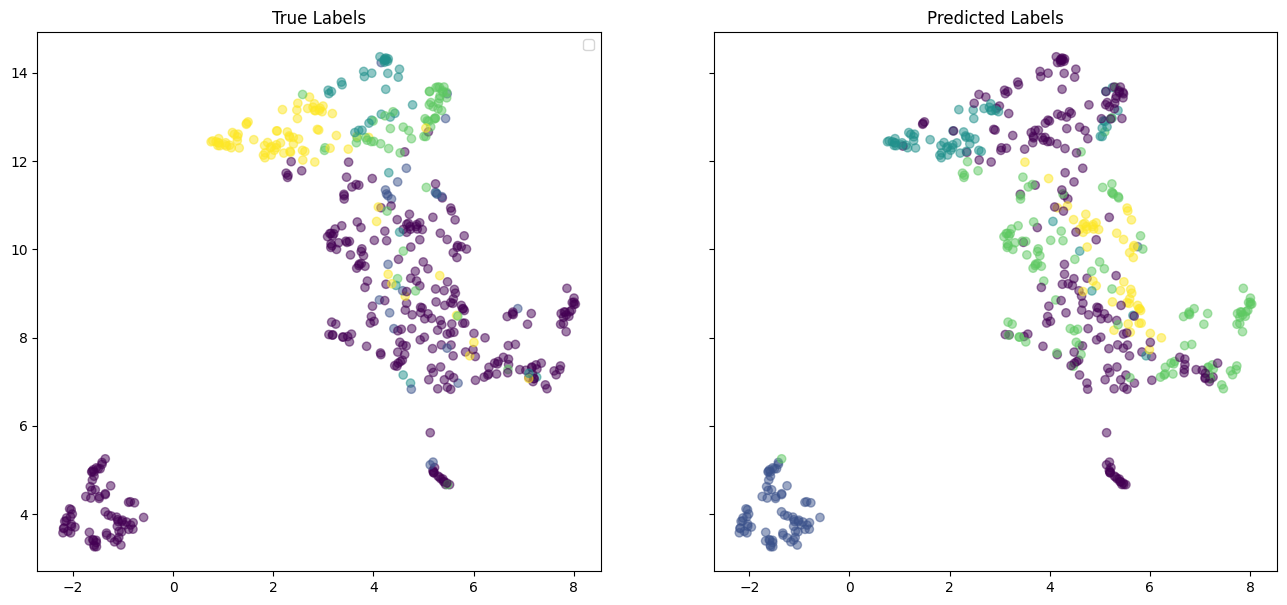

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7), sharex=True, sharey=True)

plt.axes(ax[0])
plt.scatter(x=embedding[:,0], y=embedding[:,1], c=y, alpha=0.5)
plt.title('True Labels')
plt.legend()

plt.axes(ax[1])
plt.title('Predicted Labels')
plt.scatter(x=embedding[:,0], y=embedding[:,1], c=y_pred, alpha=0.5)

# Testing Multiple Pipelines

Now that we better understand the steps in the single-cell pipeline process, we can use different techniques in each step to compare results.
We can also compute the wall and process time of each algorithm for comparison.

In [27]:
from time import process_time, time

In [28]:
def to_distance_matrix(x):
    return squareform(pdist(x))


def to_tsne(x, n_components, random_state):
    return TSNE(n_components, method='exact', random_state=random_state).fit_transform(x)

scipy_transformer = FunctionTransformer(to_distance_matrix, validate=True)
euclidian_transformer = FunctionTransformer(euclidean_distances, validate=True)
tsne_transformer = FunctionTransformer(to_tsne)

In this example, we are using 12 different pipelines:

|     | Scaling              | Dimensionality Reduction | Clustering          |
|-----|----------------------|--------------------------|---------------------|
| p1  | Max Absolute Scaling | PCA                      | KMeans              |
| p2  | Max Absolute Scaling | PCA                      | Spectral Clustering |
| p3  | Max Absolute Scaling | PCA                      | Louvain             |
| p4  | Max Absolute Scaling | PCA                      | DBSCAN              |
| p5  | Max Absolute Scaling | UMAP                     | KMeans              |
| p6  | Max Absolute Scaling | UMAP                     | Spectral Clustering |
| p7  | Max Absolute Scaling | UMAP                     | Louvain             |
| p8  | Max Absolute Scaling | UMAP                     | DBSCAN              |
| p9  | Max Absolute Scaling | TSNE                     | KMeans              |
| p10 | Max Absolute Scaling | TSNE                     | Spectral Clustering |
| p11 | Max Absolute Scaling | TSNE                     | Louvain             |
| p12 | Max Absolute Scaling | TSNE                     | DBSCAN              |

In [29]:
pipelines = [
    Pipeline(
        [
            ("scaler", MaxAbsScaler()),
            ("dimensionality_reduction", IncrementalPCA(n_components=n_components, batch_size=batch_size)),
            ("clustering", KMeans(n_clusters=n_clusters, random_state=seed)),
        ]
    ),
    Pipeline(
        [
            ("scaler", MaxAbsScaler()),
            ("dimensionality_reduction", IncrementalPCA(n_components=n_components, batch_size=batch_size)),
            ("clustering", SpectralClustering(
                n_clusters=n_clusters, random_state=seed)),
        ]
    ),
    Pipeline(
        [
            ("scaler", MaxAbsScaler()),
            ("dimensionality_reduction", IncrementalPCA(n_components=n_components, batch_size=batch_size)),
            ("distance", scipy_transformer),
            ("clustering", Louvain(random_state=seed)),
        ]
    ),
    Pipeline(
        [
            ("scaler", MaxAbsScaler()),
            ("dimensionality_reduction", IncrementalPCA(n_components=n_components, batch_size=batch_size)),
            ("clustering", DBSCAN()),
        ]
    ),
    Pipeline(
        [
            ("scaler", MaxAbsScaler()),
            ("dimensionality_reduction", UMAP(n_components=50, random_state=seed)),
            ("clustering", KMeans(n_clusters=n_clusters, random_state=seed)),
        ]
    ),
    Pipeline(
        [
            ("scaler", MaxAbsScaler()),
            ("dimensionality_reduction", UMAP(n_components=n_components, random_state=seed)),
            ("clustering", SpectralClustering(
                n_clusters=n_clusters, random_state=seed)),
        ]
    ),
    Pipeline(
        [
            ("scaler", MaxAbsScaler()),
            ("dimensionality_reduction", UMAP(n_components=50, random_state=seed)),
            ("distance", scipy_transformer),
            ("clustering", Louvain(random_state=seed)),
        ]
    ),
    Pipeline(
        [
            ("scaler", MaxAbsScaler()),
            ("dimensionality_reduction", UMAP(n_components=n_components, random_state=seed)),
            ("clustering", DBSCAN()),
        ]
    ),
    Pipeline(
        [
            ("scaler", MaxAbsScaler()),
            ("dimension_reduction",
                FunctionTransformer(
                    to_tsne,
                    kw_args={"n_components": n_components, "random_state": seed},
                )),
            ("clustering", KMeans(n_clusters=n_clusters, random_state=seed)),
        ]
    ),
    Pipeline(
        [
            ("scaler", MaxAbsScaler()),
            ("dimension_reduction",
                FunctionTransformer(
                    to_tsne,
                    kw_args={"n_components": n_components, "random_state": seed},
                )),
            ("clustering", SpectralClustering(
                n_clusters=n_clusters, random_state=seed)),
        ]
    ),
    Pipeline(
        [
            ("scaler", MaxAbsScaler()),
            ("dimension_reduction",
                FunctionTransformer(
                    to_tsne,
                    kw_args={"n_components": n_components, "random_state": seed},
                )),
            ("distance", scipy_transformer),
            ("clustering", Louvain(random_state=seed)),
        ]
    ),
    Pipeline(
        [
            ("scaler", MaxAbsScaler()),
            ("dimension_reduction",
                FunctionTransformer(
                    to_tsne,
                    kw_args={"n_components": n_components, "random_state": seed},
                )),
            ("clustering", DBSCAN()),
        ]
    )
]

In [30]:
pipeline_names = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12']
techniques = ['PCA+KMeans', 'PCA+SpectralClustering', 'PCA+Louvain', 'PCA+DBSCAN', 
              'UMAP+KMeans', 'UMAP+SpectralClustering', 'UMAP+Louvain', 'UMAP+DBSCAN', 
              'TSNE+KMeans', 'TSNE+SpectralClustering', 'TSNE+Louvain', 'TSNE+DBSCAN']

This cell might take a few minutes to finish, especially for the t-SNE pipelines.

In [31]:
homogeneity_scores = []
rand_scores = []
predictions = []
process_times = []
wall_times = []

for index, pipeline in enumerate(pipelines):
    print(f"Training pipeline p{index+1}: {techniques[index]}")

    wall_start = time()
    process_start = process_time()
    pipeline.fit(x)
    process_end = process_time()
    wall_end = time()

    y_pred = pipeline['clustering'].labels_
    predictions.append(y_pred)
    homogeneity_scores.append(round(homogeneity_score(y, y_pred), 4))
    rand_scores.append(round(rand_score(y, y_pred), 4))
    wall_times.append(wall_end - wall_start)
    process_times.append(process_end - process_start)

Training pipeline p1: PCA+KMeans


/home/mdevino/dr-notebook/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training pipeline p2: PCA+SpectralClustering
Training pipeline p3: PCA+Louvain
Training pipeline p4: PCA+DBSCAN
Training pipeline p5: UMAP+KMeans


/home/mdevino/dr-notebook/venv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/mdevino/dr-notebook/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training pipeline p6: UMAP+SpectralClustering


/home/mdevino/dr-notebook/venv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Training pipeline p7: UMAP+Louvain


/home/mdevino/dr-notebook/venv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Training pipeline p8: UMAP+DBSCAN


/home/mdevino/dr-notebook/venv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Training pipeline p9: TSNE+KMeans


/home/mdevino/dr-notebook/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training pipeline p10: TSNE+SpectralClustering


/home/mdevino/dr-notebook/venv/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/mdevino/dr-notebook/venv/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Training pipeline p11: TSNE+Louvain
Training pipeline p12: TSNE+DBSCAN


Once all pipelines are trained, we can look at the metrics to see which one performed better. By sorting by homogeneity_score, then by rand_score, we can see that pipelines that used Louvain as the clustering technique (p3, p7 and P11) performed equally better.

In [32]:
results = pd.DataFrame({
    'pipelines': pipeline_names,
    'techniques': techniques,
    'homogeneity_score': homogeneity_scores,
    'rand_score': rand_scores
})
results.sort_values(['homogeneity_score', 'rand_score'], ascending=False)

,pipelines,techniques,homogeneity_score,rand_score
2,p3,PCA+Louvain,1.0000,0.5778
6,p7,UMAP+Louvain,1.0000,0.5778
10,p11,TSNE+Louvain,1.0000,0.5778
0,p1,PCA+KMeans,0.3750,0.5765
7,p8,UMAP+DBSCAN,0.2975,0.5629
8,p9,TSNE+KMeans,0.2970,0.6425
4,p5,UMAP+KMeans,0.2949,0.5505
5,p6,UMAP+SpectralClustering,0.2428,0.4885
1,p2,PCA+SpectralClustering,0.0129,0.4305
9,p10,TSNE+SpectralClustering,0.0008,0.4213


Once again, we can look at how the true labels look like in a scatter plot using UMAP.

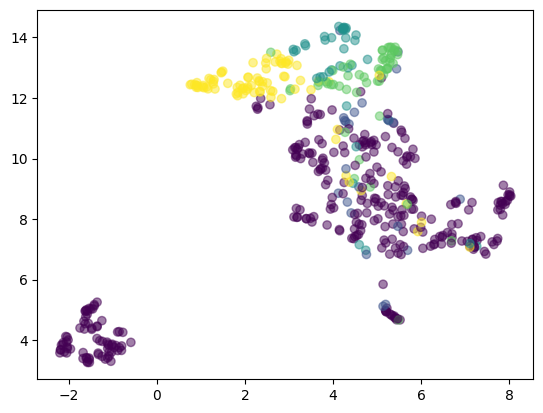

In [33]:
plt.scatter(x=embedding[:,0], y=embedding[:,1], c=y, alpha=0.5)

And we can do the same thing for each pipeline.

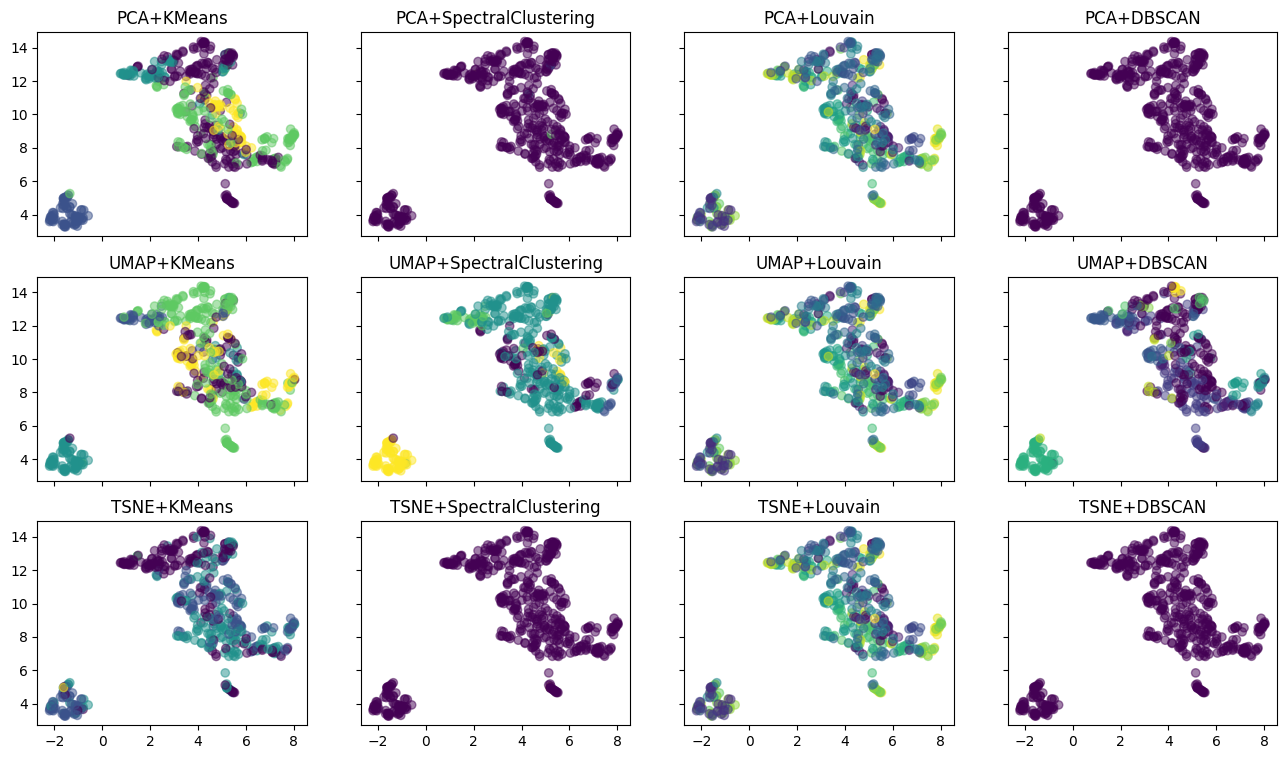

In [34]:
fig, ax = plt.subplots(3, 4, figsize=(16, 9), sharex=True, sharey=True)
ax = ax.reshape(-1)

for index, prediction in enumerate(predictions):
    technique = techniques[index]
    plt.axes(ax[index])
    plt.scatter(x=embedding[:,0], y=embedding[:,1], c=prediction, alpha=0.5)
    plt.title(technique)


## Visualizing Metrics

In [36]:
import seaborn as sns

In [37]:
sns.set(rc={'figure.figsize':(8,4.5)})

We can also look at the clustering metrics in a plot, as well as the time taken during training.
As we have seen before, models using Louvain as the clustering technique had the highest homogeneity score.
On the other hand, p9 (TSNE+KMeans) is the pipeline with the highest rand index (or rand score, as Scikit Learn refers to it).

In terms of training time, while it may vary depending on the harware, it's noticeable pipelines using TSNE took much longer to finish training.
That is because TSNE is better suited for dimensionality reductions whose the number of dimensions is lower than four.

Note: For multi-CPU systems, the process time might be higher than wall time due to parallelism.

Text(0.5, 1.0, 'Process Time (in seconds)')

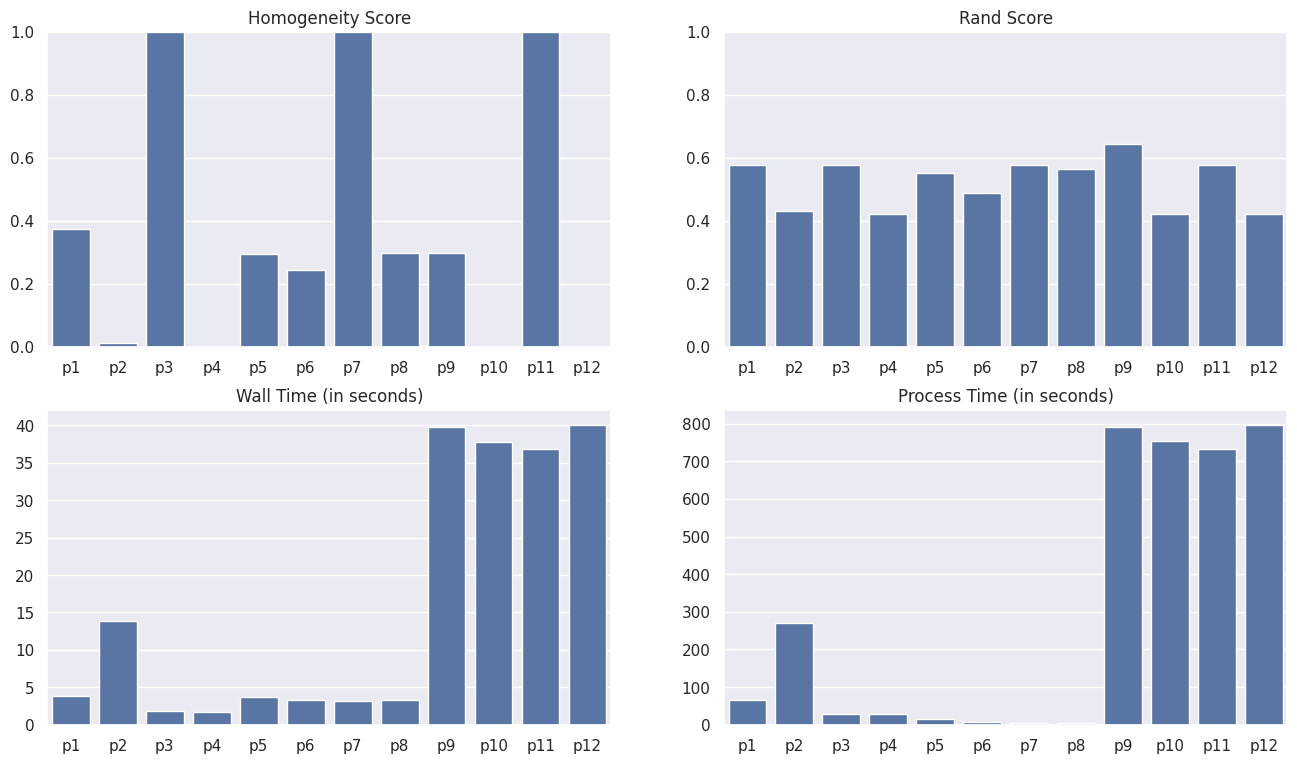

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(16, 9))

ax = sns.barplot(x=pipeline_names, y=homogeneity_scores, ax=axs[0][0])
ax.set_ylim([0, 1])
ax.set_title('Homogeneity Score')

ax = sns.barplot(x=pipeline_names, y=rand_scores, ax=axs[0][1])
ax.set_ylim([0, 1])
ax.set_title('Rand Score')

ax = sns.barplot(x=pipeline_names, y=wall_times, ax=axs[1][0])
ax.set_title('Wall Time (in seconds)')

ax = sns.barplot(x=pipeline_names, y=process_times, ax=axs[1][1])
ax.set_title('Process Time (in seconds)')